In [ ]:
import numpy as np

len(np.unique(y))


3

In [ ]:
train_ds.save(folder_path)  # Lưu ý là thư mục chứ ko phải tệp


In [ ]:
317960 * 5.68 / 100


18060.127999999997

In [ ]:
1 / 4 * 45167


11291.75

In [ ]:

transformer_layers = keras.Sequential(
    [   
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.Rescaling(1.0 / 255),
    ]
)

# Thực hiện data transformation 
train_ds_transformed = train_ds.map(lambda x, y: (transformer_layers(x), y))
val_ds_transformed = val_ds.map(lambda x, y: (transformer_layers(x), y))


# Tạo model 
# Input 
inputs = keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) 

# Các lớp Conv2D và MaxPooling2D
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)

# Flatten và Dense layers
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(n_classes, activation="softmax")(x)

# Tạo mô hình bằng cách nối input và output
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer= keras.optimizers.RMSprop(),
    loss= "sparse_categorical_crossentropy",
    metrics= ['accuracy']
)

# Thực hiện model training 
history = model.fit(
    train_ds_transformed,
    epochs = 180,
    batch_size = BATCH_SIZE,
    verbose = 0,
    validation_data = val_ds_transformed,
     callbacks=[TqdmCallback(verbose=1)]
)

SyntaxError: invalid syntax (332394445.py, line 8)

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {"C": [1]}

log = LogisticRegression()
log.set_params(**param_grid)


LogisticRegression(C=[1])

In [ ]:
EarlyStopping(
    monitor="val_loss", # Tham số theo dõi 
    min_delta=0.01, # Giá trị min cho sự cải thiện 
    patience=5, # Số epoch được tiếp tục khi không có sự cải thiện của min_delta
)

In [1]:
from tensorflow.keras.callbacks import EarlyStopping

# Tên lớp dưới dạng chuỗi
class_name = "EarlyStopping"

# Tạo đối tượng EarlyStopping từ chuỗi class_name
callback_class = globals()[class_name]

# Khởi tạo đối tượng EarlyStopping
early_stopping = callback_class(monitor='val_loss', patience=5)

# In đối tượng để kiểm tra
print(early_stopping)


In [2]:
from src.classifier.Mylib import myfuncs

text = "LogisticRegression-C=0.5-penalty=l1-solver=saga-max_iter=1000"
model = myfuncs.get_object_from_string_4(text)
print(model)

LogisticRegression(C=0.5, max_iter=1000, penalty='l1', solver='saga')


In [14]:

import tensorflow as tf
import sklearn

# Chuỗi đầu vào
layer_str = 'LogisticRegression(C=144,penalty="l1",solver="saga",max_iter=10000,dual=True)'

# Tách tên lớp và tham số
layer_name, params = layer_str.split("(", 1)
params = params.rstrip(")")

# Lấy lớp từ tf.keras.layers
layer_class = getattr(sklearn.linear_model, layer_name)

# Tạo đối tượng bằng eval (không khuyến khích nếu có dữ liệu không đáng tin cậy)
layer = eval(f"layer_class({params})")

# Kiểm tra kết quả
print(layer)


LogisticRegression(C=144, dual=True, max_iter=10000, penalty='l1',
                   solver='saga')


In [7]:
import sklearn
import sklearn.linear_model 
from src.classifier.Mylib import myfuncs

layer_str = 'LogisticRegression(C=144, penalty="l1", solver="saga"    ,max_iter=10000,dual=True)'

obj = myfuncs.get_object_from_string_using_eval_6(layer_str, sklearn.linear_model)

print(obj)

LogisticRegression(C=144, dual=True, max_iter=10000, penalty='l1',
                   solver='saga')


In [3]:
from sklearn.linear_model import LogisticRegression
from src.classifier.Mylib import myfuncs

text = 'LogisticRegression(C=144)'

obj = myfuncs.get_object_from_string_4(text)

print(obj)

LogisticRegression(C=144)


In [13]:
layer.get_params()

{'C': 144,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
import pandas as pd

# Tạo DataFrame A
data_A = {"A": [10, 20, 30, 40], "B": [5, 15, 25, 35], "C": [100, 200, 300, 400]}
df_A = pd.DataFrame(data_A)

# Tạo DataFrame B
data_B = {"A": [1, 2, 3, 4], "B": [0, 1, 2, 3], "C": [10, 20, 30, 40]}
df_B = pd.DataFrame(data_B)

# Trừ df_B khỏi df_A
df_C = df_A - df_B

df_C


,A,B,C
0,9,5,90
1,18,14,180
2,27,23,270
3,36,32,360


In [3]:
import tensorflow as tf

print(tf.__version__)

2.10.0


In [5]:

1/255

0.00392156862745098

In [4]:
import ast 


text = "'val_accuracy'"

a = ast.literal_eval(text)

print(type(a))

<class 'str'>


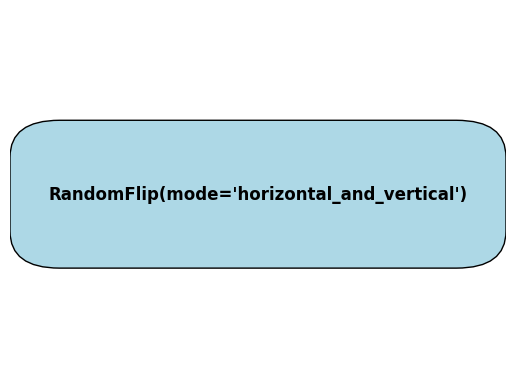

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Chuỗi cần vẽ
text = "RandomFlip(mode='horizontal_and_vertical')"
text1 = "RandomRotation(factor=0.2)"

# Tạo hình chữ nhật bao quanh chuỗi
fig, ax = plt.subplots()

# Vẽ hình chữ nhật
rect = patches.FancyBboxPatch((0.1, 0.4), 0.8, 0.2, boxstyle="round,pad=0.1", linewidth=1, edgecolor="black", facecolor="lightblue")
ax.add_patch(rect)

# Thêm chuỗi vào hình
ax.text(0.5, 0.5, text, ha="center", va="center", fontsize=12, fontweight="bold")

# Cấu hình plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_axis_off()

# Lưu hình ảnh vào file
plt.savefig("RandomFlip_image.png", format="png", bbox_inches="tight", pad_inches=0.1)

# Hiển thị ảnh
plt.show()


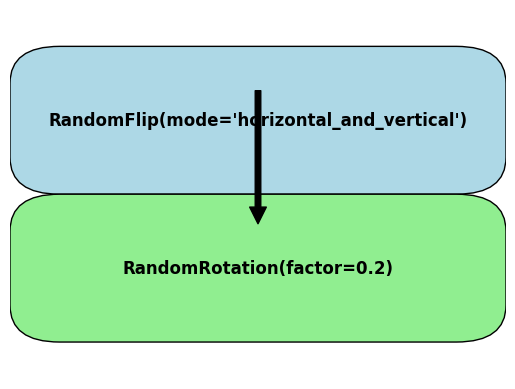

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Chuỗi cần vẽ
text = "RandomFlip(mode='horizontal_and_vertical')"
text1 = "RandomRotation(factor=0.2)"

# Tạo hình chữ nhật bao quanh chuỗi
fig, ax = plt.subplots()

# Vẽ hình chữ nhật bao quanh text
rect1 = patches.FancyBboxPatch((0.1, 0.6), 0.8, 0.2, boxstyle="round,pad=0.1", linewidth=1, edgecolor="black", facecolor="lightblue")
ax.add_patch(rect1)

# Vẽ hình chữ nhật bao quanh text1
rect2 = patches.FancyBboxPatch((0.1, 0.2), 0.8, 0.2, boxstyle="round,pad=0.1", linewidth=1, edgecolor="black", facecolor="lightgreen")
ax.add_patch(rect2)

# Thêm chuỗi vào hình
ax.text(0.5, 0.7, text, ha="center", va="center", fontsize=12, fontweight="bold")
ax.text(0.5, 0.3, text1, ha="center", va="center", fontsize=12, fontweight="bold")

# Vẽ dấu mũi tên từ rect1 đến rect2
ax.annotate('', xy=(0.5, 0.4), xytext=(0.5, 0.8),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Cấu hình plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_axis_off()

# Lưu hình ảnh vào file
file_path = "RandomFlip_with_arrow.png"
plt.savefig(file_path, format="png", bbox_inches="tight", pad_inches=0.1)

# Hiển thị ảnh
plt.show()


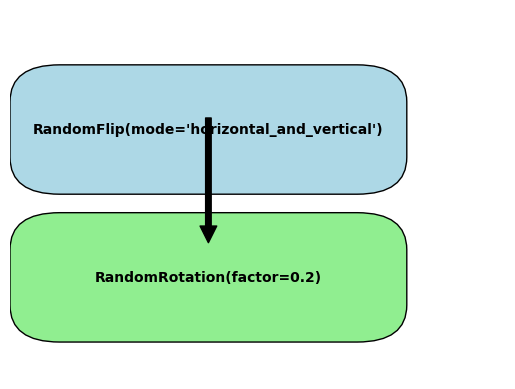

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Chuỗi cần vẽ
text = "RandomFlip(mode='horizontal_and_vertical')"
text1 = "RandomRotation(factor=0.2)"

# Tạo hình chữ nhật bao quanh chuỗi
fig, ax = plt.subplots()

# Vẽ hình chữ nhật bao quanh text
rect1 = patches.FancyBboxPatch((0.1, 0.6), 0.6, 0.15, boxstyle="round,pad=0.1", linewidth=1, edgecolor="black", facecolor="lightblue")
ax.add_patch(rect1)

# Vẽ hình chữ nhật bao quanh text1
rect2 = patches.FancyBboxPatch((0.1, 0.2), 0.6, 0.15, boxstyle="round,pad=0.1", linewidth=1, edgecolor="black", facecolor="lightgreen")
ax.add_patch(rect2)

# Thêm chuỗi vào hình, thu nhỏ kích thước chữ
ax.text(0.4, 0.675, text, ha="center", va="center", fontsize=10, fontweight="bold")
ax.text(0.4, 0.275, text1, ha="center", va="center", fontsize=10, fontweight="bold")

# Vẽ dấu mũi tên từ lề dưới của rect1 đến lề trên của rect2
ax.annotate('', xy=(0.4, 0.35), xytext=(0.4, 0.725),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Cấu hình plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_axis_off()

# Lưu hình ảnh vào file
file_path = "RandomFlip_with_arrow_updated.png"
plt.savefig(file_path, format="png", bbox_inches="tight", pad_inches=0.1)

# Hiển thị ảnh
plt.show()


'RandomFlip_with_arrow_final.png'

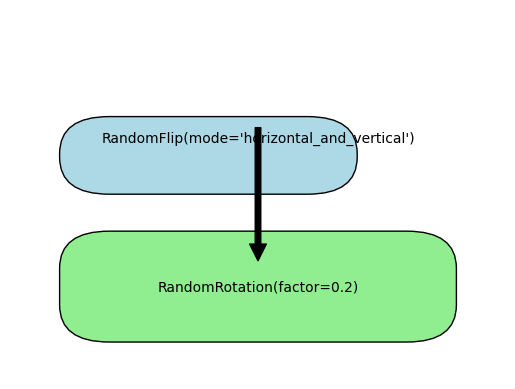

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Chuỗi cần vẽ
text = "RandomFlip(mode='horizontal_and_vertical')"
text1 = "RandomRotation(factor=0.2)"

# Tạo hình chữ nhật bao quanh chuỗi
fig, ax = plt.subplots()

# Vẽ hình chữ nhật bao quanh text (Thu nhỏ kích thước hình chữ nhật)
rect1 = patches.FancyBboxPatch((0.2, 0.6), 0.4, 0.01, boxstyle="round,pad=0.1", linewidth=1, edgecolor="black", facecolor="lightblue")
ax.add_patch(rect1)

# Vẽ hình chữ nhật bao quanh text1 (Thu nhỏ kích thước hình chữ nhật)
rect2 = patches.FancyBboxPatch((0.2, 0.2), 0.6, 0.1, boxstyle="round,pad=0.1", linewidth=1, edgecolor="black", facecolor="lightgreen")
ax.add_patch(rect2)

# Thêm chuỗi vào hình, thu nhỏ kích thước chữ
ax.text(0.5, 0.65, text, ha="center", va="center", fontsize=10)
ax.text(0.5, 0.25, text1, ha="center", va="center", fontsize=10)

# Vẽ dấu mũi tên từ mép dưới của rect1 đến mép trên của rect2
ax.annotate('', xy=(0.5, 0.3), xytext=(0.5, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Cấu hình plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_axis_off()

# Lưu hình ảnh vào file
file_path = "RandomFlip_with_arrow_final.png"
plt.savefig(file_path, format="png", bbox_inches="tight", pad_inches=0.1)

# Hiển thị file path
file_path


'RandomFlip_with_arrow_updated.png'

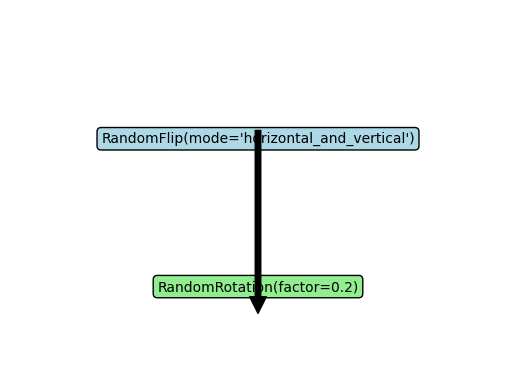

In [17]:
import matplotlib.pyplot as plt

# Chuỗi cần vẽ
text = "RandomFlip(mode='horizontal_and_vertical')"
text1 = "RandomRotation(factor=0.2)"

# Tạo figure và axes
fig, ax = plt.subplots()

# Vẽ hình chữ nhật kèm chữ và căn giữa
ax.text(0.5, 0.65, text, ha="center", va="center", fontsize=10, 
        bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))

ax.text(0.5, 0.25, text1, ha="center", va="center", fontsize=10, 
        bbox=dict(facecolor="lightgreen", edgecolor="black", boxstyle="round,pad=0.3"))

# Vẽ dấu mũi tên từ mép dưới của text1 đến mép trên của text2
ax.annotate('', xy=(0.5, 0.15), xytext=(0.5, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Cấu hình plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_axis_off()

# Lưu hình ảnh vào file
file_path = "RandomFlip_with_arrow_updated.png"
plt.savefig(file_path, format="png", bbox_inches="tight", pad_inches=0.1)

# Hiển thị file path
file_path


'RandomFlip_with_arrow_final.png'

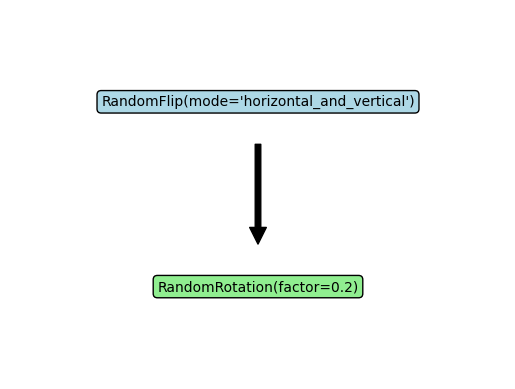

In [18]:
import matplotlib.pyplot as plt

# Chuỗi cần vẽ
text = "RandomFlip(mode='horizontal_and_vertical')"
text1 = "RandomRotation(factor=0.2)"

# Tạo figure và axes
fig, ax = plt.subplots()

# Vẽ hình chữ nhật kèm chữ và căn giữa
ax.text(0.5, 0.75, text, ha="center", va="center", fontsize=10, 
        bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))

ax.text(0.5, 0.25, text1, ha="center", va="center", fontsize=10, 
        bbox=dict(facecolor="lightgreen", edgecolor="black", boxstyle="round,pad=0.3"))

# Vẽ dấu mũi tên từ mép dưới của text1 đến mép trên của text2
ax.annotate('', xy=(0.5, 0.35), xytext=(0.5, 0.65),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Cấu hình plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_axis_off()

# Lưu hình ảnh vào file
file_path = "RandomFlip_with_arrow_final.png"
plt.savefig(file_path, format="png", bbox_inches="tight", pad_inches=0.1)

# Hiển thị file path
file_path


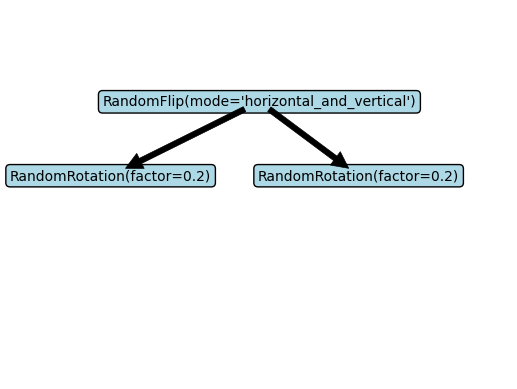

In [ ]:
import matplotlib.pyplot as plt


def draw_arrow_between_texts(ax, text1_pos, text2_pos):
    """
    Vẽ mũi tên giữa hai vị trí text.
    """
    ax.annotate('', xy=text2_pos, xytext=text1_pos,
                arrowprops=dict(facecolor='black', shrink=0.1, linewidth=0.5))

# Các layers
text = "RandomFlip(mode='horizontal_and_vertical')"
text1 = "RandomRotation(factor=0.2)"
text2 = "RandomRotation(factor=0.8)"


# Vị trí của các layers
text_pos1 = (0.5, 0.75)
text_pos2 = (0.2, 0.55)
text_pos3 = (0.7, 0.55)


fig, ax = plt.subplots()

ax.text(*text_pos1, text, ha="center", va="center", fontsize=10, 
        bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))

ax.text(*text_pos2, text1, ha="center", va="center", fontsize=10, 
        bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))
ax.text(*text_pos3, text1, ha="center", va="center", fontsize=10, 
        bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.3"))

draw_arrow_between_texts(ax, text_pos1, text_pos2)
draw_arrow_between_texts(ax, text_pos1, text_pos3)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_axis_off()

file_path = "RandomFlip_with_arrow_final_v2.png"
plt.savefig(file_path, format="png", bbox_inches="tight", pad_inches=0.1) # Lưu ảnh vào file


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

# Tạo mô hình đơn giản
model = models.Sequential()

# Thêm layer với tham số đi kèm trong tên layer
model.add(layers.RandomFlip(mode='horizontal_and_vertical', input_shape=(224, 224, 3), name='RandomFlip(mode=horizontal_and_vertical)'))
model.add(layers.RandomRotation(factor=0.2, name='RandomRotation(factor=0.2)'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='Conv2D(32)'))
model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2D'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax', name='Dense(10)'))

# Vẽ mô hình với tham số trong tên các layer
plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True, show_layer_names=True)


ValueError: 'RandomFlip(mode=horizontal_and_vertical)/' is not a valid root scope name. A root scope name has to match the following pattern: ^[A-Za-z0-9.][A-Za-z0-9_.\\/>-]*$

In [ ]:
ax.annotate(
    '', # không hiển thị văn bản gì 
    xy=(0.5, 0.35), # điểm cuối của múi tên 
    xytext=(0.5, 0.65), # điểm đầu của múi tên 
    arrowprops=dict(
        facecolor='black',  # màu mũi tên 
        shrink=0.05 # thu nhỏ kích thước mũi tên 
    ) 
)

In [1]:
a= 10 
b = 5 

c = (a, b)

print(type(c))

<class 'tuple'>


In [1]:
from keras_cv.layers import RandomFlip


RandomFlip(mode="horizontal_and_vertical")

RuntimeError: The Tensorflow package version needs to be at least 2.11.0 for KerasCV to run. Currently, your TensorFlow version is 2.10.0. Please upgrade with `$ pip install --upgrade tensorflow`. You can use `pip freeze` to check afterwards that everything is ok.

In [ ]:
18060 / 4 * 6


27090.0

['HadArthritis_bin',
'SmokerStatus_ord',
'MentalHealthDays_num',
'LastCheckupTime_ord',
'FluVaxLast12_bin',
'DifficultyConcentrating_bin',
'Sex_nom',
'HadKidneyDisease_bin',
'HadCOPD_bin',
'DeafOrHardOfHearing_bin',
'AgeCategory_nom',
'PhysicalActivities_bin',
'HadStroke_bin',
'HadDiabetes_nom',
'SleepHours_num',
'RemovedTeeth_nom',
'HadSkinCancer_bin',
'DifficultyWalking_bin',
'DifficultyErrands_bin',
'PneumoVaxEver_bin',
'AlcoholDrinkers_bin',
'State_nom',
'HadHeartAttack',
'DifficultyDressingBathing_bin',
'HadAsthma_bin',
'PhysicalHealthDays_num',
'HadDepressiveDisorder_bin',
'HadAngina_bin',
'BlindOrVisionDifficulty_bin',
'TetanusLast10Tdap_nom',
'ECigaretteUsage_ord',
'GeneralHealth_ord']


- HadArthritis_bin co No chiem 66%
- SmokerStatus_ord co 'Never smoked' chiem 63%
- MentalHealthDays_num co 0 chiem 60%
- LastCheckupTime_ord co 'Within past year' chiem 80%
- FluVaxLast12_bin co No va Yes can bang
- DifficultyConcentrating_bin co No chiem 88%
- Sex_nom co Male va Female can bang
- HadKidneyDisease_bin co No chiem 95%
- HadCOPD_bin co No chiem 92%
- DeafOrHardOfHearing_bin co No chiem 91%
- AgeCategory_nom co cac nhom tuoi can bang nhau
- PhysicalActivities_bin co Yes chiem 76%
- HadStroke_bin co No chiem 95%
- HadDiabetes_nom co No chiem 83%, cac gia tri con lai nghia la da tung bi
- SleepHours_num co phan bo can bang
- RemovedTeeth_nom co None chiem 55%
- HadSkinCancer_bin co No chiem 92%
- DifficultyWalking_bin co No chiem 84%
- DifficultyErrands_bin co No chiem 92%
- PneumoVaxEver_bin co phan bo can bang
- AlcoholDrinkers_bin co phan bo can bang
- State_nom co phan bo can bang
- **HadHeartAttack** co No chiem 94%
- DifficultyDressingBathing_bin co No chiem 96%
- HadAsthma_bin co No chiem 85%
- PhysicalHealthDays_num co phan bo can bang
- HadDepressiveDisorder_bin co No chiem 79%
- HadAngina_bin co No chiem 94%
- BlindOrVisionDifficulty_bin co No chiem 94%
- TetanusLast10Tdap_nom co No chiem 45%, Yes received tetanus shot not TDap + Yes received tetanus shot not sure what type chiem 31%
- ECigaretteUsage_ord co Never chiem 78%, con lai la da tung dung
- GeneralHealth_ord co Poor + Fair chiem 17%


Index(['PhysicalHealthDays_num', 'MentalHealthDays_num', 'SleepHours_num',
'HeightInMeters_num', 'WeightInKilograms_num', 'PhysicalActivities_bin',
'HadAngina_bin', 'HadStroke_bin', 'HadAsthma_bin', 'HadSkinCancer_bin',
'HadCOPD_bin', 'HadDepressiveDisorder_bin', 'HadKidneyDisease_bin',
'HadArthritis_bin', 'DeafOrHardOfHearing_bin',
'BlindOrVisionDifficulty_bin', 'DifficultyConcentrating_bin',
'DifficultyWalking_bin', 'DifficultyDressingBathing_bin',
'DifficultyErrands_bin', 'AlcoholDrinkers_bin', 'FluVaxLast12_bin',
'PneumoVaxEver_bin', 'State_nom', 'Sex_nom', 'RemovedTeeth_nom',
'HadDiabetes_nom', 'AgeCategory_nom', 'TetanusLast10Tdap_nom',
'GeneralHealth_ord', 'LastCheckupTime_ord', 'SmokerStatus_ord',
'ECigaretteUsage_ord', 'HadHeartAttack'],
dtype='object')


Y nghia cac cot

| Cot                       | Y nghia                                                               | Don vi | Phan loai |
| ------------------------- | --------------------------------------------------------------------- | ------ | --------- |
| State                     | bang                                                                  | none   | Nominal   |
| Sex                       | gioi tinh                                                             | none   | Nominal   |
| GeneralHealth             | suc khoe chung                                                        | none   | ordinal   |
| PhysicalHealthDays        | so ngay gap van de the chat                                           | none   | numeric   |
| MentalHealthDays          | so ngay gap van de tinh than                                          | none   | numeric   |
| LastCheckupTime           | lan cuoi di kham suc khoe                                             | none   | ordinal   |
| PhysicalActivities        | co tham gia hoat dong the chat khong                                  | none   | binary    |
| SleepHours                | gio ngu trong 1 ngay                                                  | none   | numeric   |
| RemovedTeeth              | so rang da bi loai bo                                                 | none   | nominal   |
| **HadHeartAttack**        | co bi heart attack khong                                              | none   | binary    |
| HadAngina                 | co bi đau thắt ngực                                                   | none   | binary    |
| HadStroke                 | co bi đột quỵ                                                         | none   | binary    |
| HadAsthma                 | co bi hen suyen khong                                                 | none   | binary    |
| HadSkinCancer             | co bi ung thu da khong                                                | none   | binary    |
| HadCOPD                   | co bi Bệnh phổi tắc nghẽn mãn tính                                    | none   | binary    |
| HadDepressiveDisorder     | co bi roi loan tam than khong                                         | none   | binary    |
| HadKidneyDisease          | co bi benh than khong                                                 | none   | binary    |
| HadArthritis              | co bi viêm khớp khong                                                 | none   | binary    |
| HadDiabetes               | co bi tieu duong khong                                                | none   | binary    |
| DeafOrHardOfHearing       | co bi chung kho nghe khong                                            | none   | binary    |
| BlindOrVisionDifficulty   | co bi chung kho nhin khong                                            | none   | binary    |
| DifficultyConcentrating   | co bi chung kho tap trung khong                                       | none   | binary    |
| DifficultyWalking         | co bi chung kho di lai khong                                          | none   | binary    |
| DifficultyDressingBathing | co bi gap kho khan trong viec thay do hay tam rua khong               | none   | binary    |
| DifficultyErrands         | co bi gap kho khan trong viec thuc hien cac cong viec hang ngay khong | none   | binary    |
| SmokerStatus              | muc do hut thuoc truyen thong                                         | none   | ordinal   |
| ECigaretteUsage           | muc do hut thuoc la dien tu                                           | none   | ordinal   |
| _ChestScan_               |                                                                       | none   | remove    |
| _RaceEthnicityCategory_   | chung toc                                                             | none   | remove    |
| AgeCategory               | pham vi tuoi                                                          | none   | nominal   |
| HeightInMeters            | chieu cao                                                             | m      | numeric   |
| WeightInKilograms         | can nang                                                              | kg     | numeric   |
| _BMI_                     | chi so BMI                                                            | none   | remove    |
| AlcoholDrinkers           | co uong ruou khong                                                    | none   | binary    |
| _HIVTesting_              |                                                                       | none   | remove    |
| FluVaxLast12              | đã tiêm vắc xin phòng cúm trong 12 tháng qua hay không.               | none   | binary    |
| PneumoVaxEver             | đã từng tiêm vắc xin phòng phổi (Pneumococcal vaccine) hay chưa       | none   | binary    |
| TetanusLast10Tdap         | muc do tiêm vắc xin phòng uốn ván trong 10 nam qua                    | none   | nominal   |
| _HighRiskLastYear_        |                                                                       | none   | remove    |
| _CovidPos_                |                                                                       | none   | remove    |


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397860 entries, 0 to 397859
Data columns (total 34 columns):

# Column Non-Null Count Dtype

---

5 PhysicalActivities_bin 396987 non-null object
6 HadAngina_bin 394627 non-null object
7 HadStroke_bin 396915 non-null object
8 HadAsthma_bin 396577 non-null object
9 HadSkinCancer_bin 395357 non-null object
10 HadCOPD_bin 396217 non-null object
11 HadDepressiveDisorder_bin 395699 non-null object
12 HadKidneyDisease_bin 396401 non-null object
13 HadArthritis_bin 395775 non-null object
14 HadDiabetes_bin 397142 non-null object
15 DeafOrHardOfHearing_bin 379641 non-null object
16 BlindOrVisionDifficulty_bin 378813 non-null object
17 DifficultyConcentrating_bin 376497 non-null object
18 DifficultyWalking_bin 376677 non-null object
19 DifficultyDressingBathing_bin 376758 non-null object
20 DifficultyErrands_bin 375211 non-null object
21 AlcoholDrinkers_bin 356594 non-null object
22 FluVaxLast12_bin 356077 non-null object
23 PneumoVaxEver_bin 329305 non-null object
24 State_nom 397860 non-null object
25 Sex_nom 397860 non-null object
26 RemovedTeeth_nom 387915 non-null object
27 AgeCategory_nom 389896 non-null object
28 TetanusLast10Tdap_nom 324445 non-null object
29 GeneralHealth_ord 396871 non-null object
30 LastCheckupTime_ord 390625 non-null object
31 SmokerStatus_ord 366478 non-null object
32 ECigaretteUsage_ord 366269 non-null object
33 HadHeartAttack 397860 non-null object
dtypes: float64(5), object(29)
memory usage: 103.2+ MB


PhysicalActivities_bin -> ['No', 'Yes', nan]
HadAngina_bin -> ['Yes', 'No', nan]
HadStroke_bin -> ['Yes', 'No', nan]
HadAsthma_bin -> ['No', 'Yes', nan]
HadSkinCancer_bin -> ['No', 'Yes', nan]
HadCOPD_bin -> ['No', 'Yes', nan]
HadDepressiveDisorder_bin -> ['Yes', 'No', nan]
HadKidneyDisease_bin -> ['No', 'Yes', nan]
HadArthritis_bin -> ['Yes', 'No', nan]
DeafOrHardOfHearing_bin -> ['Yes', 'No', nan]
BlindOrVisionDifficulty_bin -> ['No', 'Yes', nan]
DifficultyConcentrating_bin -> ['No', nan, 'Yes']
DifficultyWalking_bin -> ['Yes', 'No', nan]
DifficultyDressingBathing_bin -> ['No', nan, 'Yes']
DifficultyErrands_bin -> ['No', nan, 'Yes']
AlcoholDrinkers_bin -> ['Yes', 'No', nan]
FluVaxLast12_bin -> ['No', 'Yes', nan]
PneumoVaxEver_bin -> ['No', 'Yes', nan]


GeneralHealth_ord -> ['Poor', 'Good', 'Excellent', 'Fair', 'Very good', nan]
LastCheckupTime_ord -> ['Within past year (anytime less than 12 months ago)', 'Within past 2 years (1 year but less than 2 years ago)', 'Within past 5 years (2 years but less than 5 years ago)', '5 or more years ago', nan]

SmokerStatus_ord -> ['Former smoker', 'Never smoked', nan, 'Current smoker - now smokes every day', 'Current smoker - now smokes some days']
ECigaretteUsage_ord -> ['Not at all (right now)', 'Use them some days', 'Never used e-cigarettes in my entire life', nan, 'Use them every day']


In [ ]:
(442067 - 397450) / 442067 * 100


10.092813985210386

do_get_Diabetes_bin -> ['No', 'Yes']
do_get_Hypertension_bin -> ['No', 'Yes']
do_Family_History_bin -> ['No', 'Yes']
do_get_Genetic_Risk_Factor_bin -> ['Yes', 'No']

do_get_Alzheimer -> ['Yes', 'No']


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Tải dữ liệu
data = load_iris()
X = data.data
y = data.target


# Khởi tạo mô hình và tham số để tìm kiếm

param_dist = {
    "n_estimators": [10, 50],
    "max_depth": [2, 1],
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    scoring="accuracy",
    return_train_score=True,  # Lưu lại điểm train trong kết quả
    verbose=2,
)

random_search.fit(X, y)
best_model = random_search.best_estimator_

# Lấy kết quả từ cross-validation
cv_results = random_search.cv_results_

# Train Scores: trung bình của điểm số trong các fold huấn luyện
scores = list(zip(cv_results["mean_train_score"], cv_results["mean_test_score"]))
scores = sorted(scores, key=lambda x: x[1], reverse=True)
scores


d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_es

[(0.9583333333333334, 0.96),
 (0.9666666666666666, 0.9533333333333334),
 (0.9083333333333334, 0.9199999999999999),
 (0.8216666666666667, 0.78)]

In [ ]:
best_model.score(X, y)


0.9733333333333334

In [ ]:
20 * 5 * 4 * 4 * 


14400

In [ ]:
# Dự đoán xác suất trên tập validation
y_val_prob = best_model.predict_proba(X_val)
val_log_loss = log_loss(y_val, y_val_prob)

# Dự đoán xác suất trên tập training
y_train_prob = best_model.predict_proba(X_train)
train_log_loss = log_loss(y_train, y_train_prob)


In [ ]:
PredefinedSplit(
    test_fold=[-1] * len(self.train_feature_data) + [0] * len(self.val_feature_data)
)


In [ ]:
25 * 500


12500

In [ ]:
from sklearn.neighbors import KNeighborsTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

# Tạo dữ liệu giả (ví dụ)
X, y = make_classification(n_samples=100, n_features=20, random_state=42)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Bước 1: Sử dụng KNeighborsTransformer để transform dữ liệu
knn_transformer = KNeighborsTransformer(n_neighbors=5)

# Bước 2: Xây dựng pipeline với KNN Transformer và mô hình Logistic Regression
pipeline = Pipeline(
    steps=[
        ("knn_transform", knn_transformer),  # Áp dụng KNN để transform
        ("model", LogisticRegression()),  # Áp dụng mô hình Logistic Regression
    ]
)

# Huấn luyện pipeline
pipeline.fit(X_train, y_train)

# Đánh giá mô hình
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy of the model after KNN transformation: {accuracy:.4f}")


Physical_Activity_Level -> ['High', 'Low', 'Medium']
Smoking_Status_level -> ['Current', 'Former', 'Never']
Alcohol_Consumption_Level -> ['Occasionally', 'Never', 'Regularly']
Cholesterol_Level -> ['Normal', 'High']
Depression_Level -> ['Medium', 'Low', 'High']
Sleep_Quality_Level -> ['Poor', 'Good', 'Average']
Diet_level -> ['Healthy', 'Average', 'Unhealthy']
Air_Pollution_Exposure_level -> ['High', 'Medium', 'Low']
Social_Engagement_Level -> ['High', 'Low', 'Medium']
Income_Level -> ['High', 'Medium', 'Low']
Stress_Levels -> ['High', 'Medium', 'Low']


In [ ]:
import pandas as pd

# Tạo DataFrame
data = {"Level": ["Medium", "Low", "High", "Medium", "Low", "High"]}
df = pd.DataFrame(data)

# Chuyển cột 'Level' sang dạng category (mặc định ordered=False)
df["Level"] = df["Level"].astype("category")

# Kiểm tra thuộc tính ordered
print("Ordered mặc định:", df["Level"].cat.ordered)

# In ra danh sách các category mặc định (không có thứ tự)
print("Categories ban đầu:", df["Level"].cat.categories)

# Thay đổi thứ tự category và đặt ordered=True
df["Level"] = df["Level"].cat.reorder_categories(
    ["Low", "Medium", "High"], ordered=True
)

# Mã hóa thành các số 0, 1, 2
df["Level_code"] = df["Level"].cat.codes

df["Level_code"]


Ordered mặc định: False
Categories ban đầu: Index(['High', 'Low', 'Medium'], dtype='object')


0    1
1    0
2    2
3    1
4    0
5    2
Name: Level_code, dtype: int8

In [ ]:
# Lấy chỉ mục của dữ liệu train và val
train_idx, val_idx = list(trainval_splitter.split(df))[0]

df_train = df.iloc[train_idx, :]
df_val = df.iloc[val_idx, :]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Tải dữ liệu
data = load_iris()
X = data.data
y = data.target

# Chia dữ liệu thành train và test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình và tham số để tìm kiếm
rf = RandomForestClassifier()
param_dist = {
    "n_estimators": [10, 50],
    "max_depth": [2, 1],
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    scoring="accuracy",
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Tính toán train score (điểm trên tập train)
train_score = best_model.score(X_train, y_train)

# Tính toán validation score (điểm trên tập validation)
val_score = best_model.score(X_val, y_val)

# In kết quả
print(f"Best Estimator: {best_model}")
print(f"Train Score: {train_score}")
print(f"Validation Score: {val_score}")


d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 4

Best Estimator: RandomForestClassifier(max_depth=2, n_estimators=10)
Train Score: 0.9416666666666667
Validation Score: 1.0


d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
d:\DA_workspace\alzheimers_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:824: User

Y nghia cac cot

| Cot            | Y nghia                                       | Don vi |
| -------------- | --------------------------------------------- | ------ |
| Gender         | Gioi tinh                                     | None   |
| Age            | Tuoi tac                                      | None   |
| Height         | Chieu cao                                     | m      |
| Weight         | Can nang                                      | kg     |
| family_history | Tien su gia dinh co nguoi bi beo phi chua     | none   |
| FAVC           | Co an do nhieu calo thuong xuyen              | none   |
| FCVC           | Thoi quen an rau khong                        | none   |
| NCP            | Co bao nhieu bua an chinh                     | none   |
| CAEC           | Co an thuc an giua cac buoi an                | none   |
| SMOKE          | Co hut thuoc khong                            | none   |
| CH2O           | Luong nuoc uong moi ngay                      | lit    |
| SCC            | Ban co theo doi luong calo tieu thu hang ngay | none   |
| FAF            | Bao lau ban tap the duc                       | none   |
| TUE            | Ban su dung thiet bi cong nghe trong bao lau  | gio    |
| CALC           | Thoi quen uong ruou                           | none   |
| MTRANS         | Phuong tien nao hay su dung                   | none   |
| Obesity        | Cot target, muc do beo phi                    | none   |


In [ ]:
categorical_cols = [
    "Gender",
    "family_history",
    "do_eat_highcalo_food_frequently",
    "do_eat_between_meals",
    "do_smoke",
    "do_monitor_consumed_calo_everyday",
    "drink_frequency",
    "transport_frequently_used",
    "Obesity",
]


In [ ]:
X = X.replace(
    {
        "Obesity_Type_II": "Obesity",
        "Obesity_Type_III": "Obesity",
        "Obesity_Type_I": "Obesity",
    }
)


In [ ]:
a = ["hello", "hi", "thanks"]


Y nghia cac cot

| Cot           | Y nghia                                              | Don vi |
| ------------- | ---------------------------------------------------- | ------ |
| battery_power | tong nang luong ma pin co the luu tru                | mAh    |
| blue          | co bluetooth hoac khong                              | none   |
| clock_speed   | toc do vi xu li thuc hien tac vu                     | none   |
| dual_sim      | co tinh nang dual sim hay khong                      | none   |
| fc            | Số megapixels của camera trước                       | none   |
| four_g        | co 4G hay khong                                      | none   |
| int_memory    | dung luong bo nho trong                              | GB     |
| m_dep         | do day cua dien thoai                                | cm     |
| mobile_wt     | trong luong cua dien thoai                           | none   |
| n_cores       | Số lõi (cores) của bộ vi xử lý                       | none   |
| pc            | Số megapixels của camera chinh                       | none   |
| px_height     | Chiều cao độ phân giải điểm ảnh                      | none   |
| px_width      | Chiều rong độ phân giải điểm ảnh                     | none   |
| ram           | dung luong bo nho RAM                                | MB     |
| sc_h          | chieu cao man hinh dien thoai                        | cm     |
| sc_w          | chieu rong man hinh dien thoai                       | cm     |
| talk_time     | thời gian lâu nhất mà một lần sạc pin có thể kéo dài | none   |
| three_g       | co 3G hoac khong                                     | none   |
| touch_screen  | co man hinh cam ung hay khong                        | none   |
| wifi          | co wifi hay khong                                    | none   |
| price_range   | bien muc tieu                                        | none   |


Y nghia cac cot

| Cot                           | Y nghia                                              | Don vi |
| ----------------------------- | ---------------------------------------------------- | ------ |
| battery_power                 | tong nang luong ma pin co the luu tru                | mAh    |
| do_have_bluetooth             | co bluetooth hoac khong                              | none   |
| microprocessor_handling_speed | toc do vi xu li thuc hien tac vu                     | none   |
| do_have_dual_sim              | co tinh nang dual sim hay khong                      | none   |
| megapixels_front_cam          | Số megapixels của camera trước                       | none   |
| do_have_four_g                | co 4G hay khong                                      | none   |
| int_memory                    | dung luong bo nho trong                              | GB     |
| mobile_depth                  | do day cua dien thoai                                | cm     |
| mobile_wt                     | trong luong cua dien thoai                           | none   |
| n_cores                       | Số lõi (cores) của bộ vi xử lý                       | none   |
| megapixels_primary_cam        | Số megapixels của camera chinh                       | none   |
| px_height                     | Chiều cao độ phân giải điểm ảnh                      | none   |
| px_width                      | Chiều rong độ phân giải điểm ảnh                     | none   |
| ram_memory                    | dung luong bo nho RAM                                | MB     |
| sc_height                     | chieu cao man hinh dien thoai                        | cm     |
| sc_width                      | chieu rong man hinh dien thoai                       | cm     |
| longest_charging_time         | thời gian lâu nhất mà một lần sạc pin có thể kéo dài | none   |
| do_have_three_g               | co 3G hoac khong                                     | none   |
| do_have_touch_screen          | co man hinh cam ung hay khong                        | none   |
| do_have_wifi                  | co wifi hay khong                                    | none   |
| price_range                   | bien muc tieu                                        | none   |


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):

# Column Non-Null Count Dtype

---

0 battery_power 2000 non-null int64  
 1 microprocessor_handling_speed 2000 non-null float64
2 megapixels_front_cam 2000 non-null int64  
 3 int_memory 2000 non-null int64  
 4 mobile_depth 2000 non-null float64
5 mobile_wt 2000 non-null int64  
 6 n_cores 2000 non-null int64  
 7 megapixels_primary_cam 2000 non-null int64  
 8 px_height 2000 non-null int64  
 9 px_width 2000 non-null int64  
 10 ram_memory 2000 non-null int64  
 11 sc_height 2000 non-null int64  
 12 sc_width 2000 non-null int64  
 13 longest_charging_time 2000 non-null int64  
 14 do_have_bluetooth 2000 non-null int64  
 15 do_have_dual_sim 2000 non-null int64  
 16 do_have_four_g 2000 non-null int64  
 17 do_have_three_g 2000 non-null int64  
 18 do_have_touch_screen 2000 non-null int64  
 19 do_have_wifi 2000 non-null int64  
 20 price_range 2000 non-null int64  
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


SAI kieu du lieu

- battery_power: float
- megapixels_front_cam: float
- int_memory: float
- mobile_wt: float
- n_cores: float
- megapixels_primary_cam: float
- px_height: float
- px_width: float
- ram_memory: float
- sc_height: float
- sc_width: float
- longest_charging_time: float
- do_have_bluetooth: float
- do_have_dual_sim: float
- do_have_four_g: float
- do_have_three_g: float
- do_have_touch_screen: float
- do_have_wifi: float
- price_range: category


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Tạo DataFrame mẫu
X = pd.DataFrame(
    {"hello": [1, 2, 3], "chao_buoi_sang": [4, 5, 6], "chao_buoi_chieu": [7, 8, 9]}
)

# Khởi tạo PolynomialFeatures (bậc 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Lấy tên cột mới sau khi transform
feature_names = poly.get_feature_names_out()

# Tạo DataFrame mới với tên cột đã được cập nhật
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

X_poly_df


,hello,chao_buoi_sang,chao_buoi_chieu,hello^2,hello chao_buoi_sang,hello chao_buoi_chieu,chao_buoi_sang^2,chao_buoi_sang chao_buoi_chieu,chao_buoi_chieu^2
0,1.0,4.0,7.0,1.0,4.0,7.0,16.0,28.0,49.0
1,2.0,5.0,8.0,4.0,10.0,16.0,25.0,40.0,64.0
2,3.0,6.0,9.0,9.0,18.0,27.0,36.0,54.0,81.0


In [ ]:
column_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), NUMERIC_COLS),
        ("binary", StandardScaler(), BINARY_TYPE_COLS),
    ]
)

preprocessor = Pipeline(
    steps=[
        ("column_preprocessor", column_preprocessor),
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ]
)

X_poly = preprocessor.fit_transform(X)

# Lấy tên cột mới sau khi transform
feature_names = preprocessor.get_feature_names_out()

# Tạo DataFrame mới với tên cột đã được cập nhật
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)


In [ ]:
preprocessor = Pipeline(
    steps=[
        ("column_preprocessor", NamedColumnTransformer(column_preprocessor)),
        (
            "poly",
            NamedPolynomialFeatures(PolynomialFeatures(degree=2, include_bias=False)),
        ),
        ("deleter", ColumnDeleter()),
    ]
)


In [ ]:
randint(a, b + 1)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import numpy as np

# Tạo mô hình
model = RandomForestClassifier()

# Định nghĩa tham số với số bước nhảy 3 đơn vị
param_distributions = {
    "max_depth": randint(10 // 3, (30 // 3) + 1).rvs(size=100) * 3,
    "n_estimators": randint(50 // 10, 200 // 10 + 1).rvs(size=100)
    * 10,  # Một tham số khác ví dụ
}

# Khởi tạo RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions, n_iter=10, cv=5, random_state=42, verbose=2
)
random_search.fit(
    np.random.rand(100, 5), np.random.randint(0, 2, 100)
)  # Dữ liệu giả lập

# Hiển thị kết quả tốt nhất
print("Best parameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.2s
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=180; total time=   0.1s
[CV] END ......................max_depth=24, n_estimators=90; total time=   0.0s
[CV] END ......................max_depth=24, n_estimators=90; total time=   0.0s
[CV] END ......................max_depth=24, n_estimators=90; total time=   0.0s
[CV] END ......................max_depth=24, n_estimators=90; total time=   0.0s
[CV] END ......................max_depth=24, n_estimators=90; total time=   0.0s
[CV] END .....................max_depth=18, n_estimators=100; total time=   0.0s
[CV] END .....................max_depth=18, n_es

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start = 0.01
end = 0.9

model = GradientBoostingClassifier()

param_distributions = {
    "learning_rate": np.arange(start, end + 0.1, 0.1),
    "n_estimators": np.arange(100, 300 + 10, 10),
}

# Khởi tạo RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions, n_iter=10, cv=5, random_state=42, verbose=2
)
random_search.fit(
    np.random.rand(100, 5), np.random.randint(0, 2, 100)
)  # Dữ liệu giả lập

# Hiển thị kết quả tốt nhất
print("Best parameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............learning_rate=0.11, n_estimators=190; total time=   0.1s
[CV] END ...............learning_rate=0.11, n_estimators=190; total time=   0.1s
[CV] END ...............learning_rate=0.11, n_estimators=190; total time=   0.0s
[CV] END ...............learning_rate=0.11, n_estimators=190; total time=   0.0s
[CV] END ...............learning_rate=0.11, n_estimators=190; total time=   0.0s
[CV] END ...............learning_rate=0.81, n_estimators=140; total time=   0.0s
[CV] END ...............learning_rate=0.81, n_estimators=140; total time=   0.0s
[CV] END ...............learning_rate=0.81, n_estimators=140; total time=   0.0s
[CV] END ...............learning_rate=0.81, n_estimators=140; total time=   0.0s
[CV] END ...............learning_rate=0.81, n_estimators=140; total time=   0.0s
[CV] END learning_rate=0.41000000000000003, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.41000000000000003, n_es

In [ ]:
np.arange(start, end + 0.1, 0.1)


array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
import sklearn

print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.3.0


In [ ]:
random.sample(
    np.arange(a, b + 0.1, 0.1).tolist(),
    5,
),


In [ ]:
import random
import numpy as np

random.sample(
    np.arange(0.5, 1.0 + 0.1, 0.1).tolist(),
    5,
),


([0.7999999999999999, 0.9999999999999999, 0.7, 0.8999999999999999, 0.6],)

In [ ]:
np.arange(0.5, 1.0 + 0.1, 0.1).tolist()


[0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9999999999999999,
 1.0999999999999999]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Dữ liệu mẫu
data = np.array([["red"], ["blue"], ["green"], ["blue"], ["red"], ["green"]])

# Khởi tạo OrdinalEncoder và fit dữ liệu
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(data)

# Lấy danh sách các lớp
print(encoder.categories_)
print(data_encoded)


[array(['blue', 'green', 'red'], dtype='<U5')]
[[2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [1.]]


In [ ]:
type(encoder.categories_)


list

In [ ]:
# Trước khi thực hiện ColumnTransformer
class PreColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()

    def fit(self, X, y=None):

        return self

    def transform(self, X, y=None):
        X = X.drop(
            columns=[
                "battery_power",
                "microprocessor_handling_speed",
                "megapixels_front_cam",
            ]
        )

        X["int_memory"] = X["int_memory"].replace({27: 0.01})
        X["mobile_inch"] = X["mobile_depth"] * X["mobile_wt"]

        return X

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


# Thực hiện ColumnTransformer
class NamedColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()

    def fit(self, X, y=None):
        numeric_cols = X.select_dtypes(include=["float"]).columns.tolist()

        self.column_transformer = ColumnTransformer(
            transformers=[
                ("1", StandardScaler(), numeric_cols),
                ("2", OrdinalEncoder(), [TARGET_COL]),
            ]
        )

        self.column_transformer.fit(X)

    def transform(self, X, y=None):
        X = self.column_transformer.transform(X)

        columns = self.column_transformer.get_feature_names_out()
        columns = [self.get_real_name(item) for item in columns]
        return pd.DataFrame(X, columns=columns)

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def get_real_name(self, column):
        start_index = column.find("__") + 2
        column = column[start_index:]
        return column


# Sau khi thực hiện ColumnTransformer
class AfterColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()

    def fit(self, X, y=None):

        return self

    def transform(self, X, y=None):
        X = X.drop(
            columns=[
                "n_cores",
                "megapixels_primary_cam",
            ]
        )

        return X

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


In [ ]:
with open(<file_path>, "rb") as file:
    python_obj = dill.load(file)


In [ ]:
import random

"n_estimators": random.sample(
    np.arange(100, 300, 10).tolist(),
    5,
),


In [ ]:
import os
from pathlib import Path
import logging

logging.basicConfig(level=logging.INFO, format="[%(asctime)s]: %(message)s:")

project_name = "cnnClassifier"  # Đổi thành tên project tương ứng

list_of_files = [
    ".github/workflows/.gitkeep",
    f"src/{project_name}/__init__.py",
    f"src/{project_name}/components/__init__.py",
    f"src/{project_name}/utils",
    f"src/{project_name}/Mylib",
    f"src/{project_name}/config/__init__.py",
    f"src/{project_name}/config/configuration.py",
    f"src/{project_name}/pipeline/__init__.py",
    f"src/{project_name}/entity/__init__.py",
    f"src/{project_name}/entity/config_entity.py",
    f"src/{project_name}/constants/__init__.py",
    f"src/research/trials.ipynb",
    "config/config.yaml",
    "dvc.yaml",
    "params.yaml",
    "main.py",
    "app.py",
    "Dockerfile",
    "requirements.txt",
    "setup.py",
    "templates/index.html",
]

for filepath in list_of_files:
    filepath = Path(filepath)
    filedir, filename = os.path.split(filepath)

    if filedir != "":
        os.makedirs(filedir, exist_ok=True)
        logging.info(f"Creating the directory: {filedir} for the file: {filename}")

    if not os.path.exists(filepath) or os.path.getsize(filepath) == 0:
        with open(filepath, "w") as f:
            pass
            logging.info(f"Creating empty file: {filepath}")

    else:
        logging.info(f"{filename} is already created")


Y nghia cac cot

| Cot                                  | Y nghia                                | Don vi | Phan loai |
| ------------------------------------ | -------------------------------------- | ------ | --------- |
| Country                              | Dat nuoc dang song                     | none   | Nominal   |
| Age                                  | Tuoi                                   | none   | Numeric   |
| Gender                               | Gioi tinh                              | none   | Numeric   |
| Education Level                      | Muc do hoc van                         | none   | Numeric   |
| BMI                                  | Chi so BMI (18.5 - 35)                 | none   | Numeric   |
| Physical Activity Level              | Muc do hoat dong the chat              | none   | Ordinal   |
| Smoking Status                       | Trang thai hut thuoc                   | none   | Ordinal   |
| Alcohol Consumption                  | Tan suat tieu thu ruou                 | none   | Ordinal   |
| Diabetes                             | Co bi tieu duong khong                 | none   | binary    |
| Hypertension                         | Co bi huyet ap cao khong               | none   | binary    |
| Cholesterol Level                    | Muc do Cholesterol                     | none   | ordinal   |
| Family History of Alzheimer’s        | Co nguoi nha bi Alzheimer’s khong      | none   | binary    |
| Cognitive Test Score                 | Diem kiem tra tu duy                   | none   | Numeric   |
| Depression Level                     | Muc do tram cam                        | none   | ordinal   |
| Sleep Quality                        | Chat luong giac ngu                    | none   | ordinal   |
| Dietary Habits                       | Chat luong bua an                      | none   | ordinal   |
| Air Pollution Exposure               | Muc do tiep xuc voi o nhiem khong khi  | none   | ordinal   |
| Employment Status                    | Trang thai viec lam hien tai           | none   | nominal   |
| Marital Status                       | Trang thai hon nhan                    | none   | nominal   |
| Genetic Risk Factor (APOE-ε4 allele) | Co dinh yeu to di truyen khong         | none   | binary    |
| Social Engagement Level              | muc do tham gia vao cong tac xa hoi    | none   | ordinal   |
| Income Level                         | muc do thu nhap                        | none   | ordinal   |
| Stress Levels                        | muc do stress                          | none   | ordinal   |
| Urban vs Rural Living                | noi song                               | none   | nominal   |
| Alzheimer’s Diagnosis                | bien muc tieu, co bi Alzheimer’s khong | none   | binary    |

Marital Status = "Widowed":có nghĩa là góa, tức là một người đã mất vợ hoặc chồng.

**Alzheimer’s Diagnosis**

- Yes: Co bi Alzheimer
- No: Khong bi Alzheimer


In [ ]:
rename_dict = {
    "Education Level": "Education_Level",
    "Physical Activity Level": "Physical_Activity_Level",
    "Smoking Status": "Smoking_Status_level",
    "Alcohol Consumption": "Alcohol_Consumption_Level",
    "Diabetes": "do_get_Diabetes",
    "Hypertension": "do_get_Hypertension",
    "Cholesterol Level": "Cholesterol_Level",
    "Family History of Alzheimer’s": "do_Family_History",
    "Cognitive Test Score": "Cognitive_Test_Score",
    "Depression Level": "Depression_Level",
    "Sleep Quality": " Sleep_Quality_Level",
    "Dietary Habits": "Diet_level",
    "Air Pollution Exposure": "Air_Pollution_Exposure_level",
    "Employment Status": "Employment_Status",
    "Marital Status": "Marital_Status",
    "Genetic Risk Factor (APOE-ε4 allele)": "do_get_Genetic_Risk_Factor",
    "Social Engagement Level": "Social_Engagement_Level",
    "Income Level": "Income_Level",
    "Stress Levels": "Stress_Levels",
    "Urban vs Rural Living": "living_place_urban_or_rural",
    "Alzheimer’s Diagnosis": "do_get_Alzheimer",
}


Y nghia cac cot

| Cot                          | Y nghia                                | Don vi | Phan loai |
| ---------------------------- | -------------------------------------- | ------ | --------- |
| Country                      | Dat nuoc dang song                     | none   | Nominal   |
| Age                          | Tuoi                                   | none   | Numeric   |
| Gender                       | Gioi tinh                              | none   | Numeric   |
| Education_Level              | Muc do hoc van                         | none   | Numeric   |
| BMI                          | Chi so BMI (18.5 - 35)                 | none   | Numeric   |
| Physical_Activity_Level      | Muc do hoat dong the chat              | none   | Ordinal   |
| Smoking_Status_level         | Trang thai hut thuoc                   | none   | Ordinal   |
| Alcohol_Consumption_Level    | Tan suat tieu thu ruou                 | none   | Ordinal   |
| do_get_Diabetes              | Co bi tieu duong khong                 | none   | binary    |
| do_get_Hypertension          | Co bi huyet ap cao khong               | none   | binary    |
| Cholesterol_Level            | Muc do Cholesterol                     | none   | ordinal   |
| do_Family_History            | Co nguoi nha bi Alzheimer’s khong      | none   | binary    |
| Cognitive_Test_Score         | Diem kiem tra tu duy                   | none   | Numeric   |
| Depression_Level             | Muc do tram cam                        | none   | ordinal   |
| Sleep_Quality_Level          | Chat luong giac ngu                    | none   | ordinal   |
| Diet_level                   | Chat luong bua an                      | none   | ordinal   |
| Air_Pollution_Exposure_level | Muc do tiep xuc voi o nhiem khong khi  | none   | ordinal   |
| Employment_Status            | Trang thai viec lam hien tai           | none   | nominal   |
| Marital_Status               | Trang thai hon nhan                    | none   | nominal   |
| do_get_Genetic_Risk_Factor   | Co dinh yeu to di truyen khong         | none   | binary    |
| Social_Engagement_Level      | muc do tham gia vao cong tac xa hoi    | none   | ordinal   |
| Income_Level                 | muc do thu nhap                        | none   | ordinal   |
| Stress_Levels                | muc do stress                          | none   | ordinal   |
| living_place_urban_or_rural  | noi song                               | none   | nominal   |
| do_get_Alzheimer             | bien muc tieu, co bi Alzheimer’s khong | none   | binary    |

Marital_Status = "Widowed":có nghĩa là góa, tức là một người đã mất vợ hoặc chồng.

**do_get_Alzheimer**

- Yes: Co bi Alzheimer
- No: Khong bi Alzheimer


In [ ]:
import pandas as pd
import plotly.express as px

# Tạo dữ liệu
a = [f"abcdefl_{item}" for item in range(1, 40 + 1, 1)]
b = [6, 6, 7, 7] * 10
c = [7, 8, 9, 1] * 10

# Chuyển đổi dữ liệu từ wide format sang long format
df = pd.DataFrame({"x": a, "b": b, "c": c})
df_long = df.melt(
    id_vars=["x"], value_vars=["b", "c"], var_name="Category", value_name="y"
)

# Vẽ biểu đồ với màu tùy chỉnh
fig = px.line(
    df_long,
    x="x",
    y="y",
    color="Category",  # Phân biệt hai đường theo giá trị `b` và `c`
    markers=True,
    color_discrete_map={"b": "blue", "c": "gray"},  # Đặt màu: "b" là xanh, "c" là xám
)

fig.update_layout(
    showlegend=False,
    yaxis=dict(
        title="",
    ),
)

# Hiển thị biểu đồ
fig.show()


In [ ]:
import plotly.express as px

# Tạo dữ liệu demo
df = px.data.iris()

# Vẽ biểu đồ
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")

# Hiển thị biểu đồ và tắt modebar
fig.show(config={"displayModeBar": False})  # 👈 Tắt hoàn toàn modebar


In [ ]:
import plotly.express as px
import pandas as pd

# Tạo dữ liệu với nhiều điểm trên trục X
a = [f"abcdefl_{item}" for item in range(1, 40 + 1, 1)]
b = [6, 6, 7, 7] * 10
c = [7, 8, 9, 1] * 10

df = pd.DataFrame({"x": a, "y": b})

# Tạo biểu đồ line
fig = px.line(
    df,
    x="x",
    y="y",
    markers=True,
    hover_data={"x": False},  # Ẩn giá trị x trong tooltip, chỉ hiển thị y
)

# Thêm annotation cho từng điểm
for i in range(len(a)):
    text = """
    P: 1 <br>
    XGB_20:<br>
    n_e: 300-500-50<br>
    n_e: 300-500-50<br>
    n_e: 300-500-50<br>
    n_e: 300-500-50<br>
    n_e: 300-500-50<br>
    n_e: 0.3-0.5-10<br>
    """

    fig.add_annotation(
        text=text,  # 👈 Hiển thị giá trị `y`
        x=a[i],  # Đúng vị trí điểm trên trục X
        y=8,
        xref="x",
        yref="y",
        showarrow=True,  # 👈 Hiển thị mũi tên
        font=dict(family="Consolas", size=6, color="red"),  # Font chữ
        ax=-20,  # Giữ annotation thẳng đứng trên điểm
        align="left",
    )

# Giảm khoảng cách từ 0 đến a_1
fig.update_layout(
    autosize=False,
    width=3000,  # 👈 Tăng chiều rộng biểu đồ để tạo thanh cuộn ngang
    height=500,  # 👈 Giữ chiều cao hợp lý
    margin=dict(l=10, r=10, t=10, b=10),  # 👈 Giảm lề trái để `a_1` gần trục y hơn
    xaxis=dict(
        range=[-0.5, len(a)],  # 👈 Đặt lại phạm vi trục X để `a_1` gần 0 hơn
        tickmode="linear",  # 👈 Giữ khoảng cách đều giữa các điểm
    ),
    yaxis=dict(
        title="",
        range=[0, 10],  # Cố định phạm vi trục y
        dtick=0.5,  # Đặt bước chia nhỏ nhất là 0.5
    ),
)

# Lưu file HTML trực tiếp với Plotly
html_path = "scrollable_plot.html"
fig.write_html(html_path)

# Mở file HTML trong trình duyệt
import webbrowser

webbrowser.open(html_path)


True

In [ ]:
3000 / 40


75.0

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66854 entries, 0 to 66853
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           66854 non-null  int64  
 1   Education_Level               66854 non-null  int64  
 2   BMI                           66854 non-null  float64
 3   Cognitive_Test_Score          66854 non-null  int64  
 4   do_get_Diabetes               66854 non-null  object 
 5   do_get_Hypertension           66854 non-null  object 
 6   do_Family_History             66854 non-null  object 
 7   do_get_Genetic_Risk_Factor    66854 non-null  object 
 8   Gender                        66854 non-null  object 
 9   Country                       66854 non-null  object 
 10  Employment_Status             66854 non-null  object 
 11  Marital_Status                66854 non-null  object 
 12  living_place_urban_or_rural   66854 non-null  object 
 13  P

In [ ]:
a = ["a", "b", "c"]
cols = sum(([item, "", ""] for item in a), [])
print(cols)


['a', '', '', 'b', '', '', 'c', '', '']


In [ ]:
df.columns


Index(['Age', 'Education_Level', 'BMI', 'Cognitive_Test_Score',
       'do_get_Diabetes', 'do_get_Hypertension', 'do_Family_History',
       'do_get_Genetic_Risk_Factor', 'Gender', 'Country', 'Employment_Status',
       'Marital_Status', 'living_place_urban_or_rural',
       'Physical_Activity_Level', 'Smoking_Status_level',
       'Alcohol_Consumption_Level', 'Cholesterol_Level', 'Depression_Level',
       'Sleep_Quality_Level', 'Diet_level', 'Air_Pollution_Exposure_level',
       'Social_Engagement_Level', 'Income_Level', 'Stress_Levels',
       'do_get_Alzheimer'],
      dtype='object')

In [ ]:
len(
    [
        "France",
        "Spain",
        "Australia",
        "Norway",
        "Saudi Arabia",
        "South Korea",
        "Japan",
        "Germany",
        "Mexico",
        "Argentina",
        "China",
        "USA",
        "Brazil",
        "Russia",
        "Sweden",
        "South Africa",
        "India",
        "Italy",
        "UK",
        "Canada",
    ]
)


20

In [ ]:
4 + 4 + 1 + 19 + 2 + 2 + 1 + 11


44

In [ ]:
Physical_Activity_Level = ["Low", "Medium", "High"]

a = [Physical_Activity_Level] * 5

print(a)


[['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High']]


In [ ]:
import numpy as np

arr = np.arange(0.7, 0.9, 0.01)
# rounded_arr = np.round(arr, 2)

arr


array([0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 ,
       0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ])

In [ ]:
import random

a = [1, 2, 3, 4, 5]
a_permuted = random.sample(a, len(a))


[1, 2, 5, 3, 4]

In [ ]:
import itertools
import numpy as np
from xgboost import XGBClassifier


# Hàm tạo danh sách tất cả các tổ hợp tham số
def generate_grid_search_params(param_grid):
    keys = param_grid.keys()
    values = (param_grid[key] for key in keys)
    return [dict(zip(keys, v)) for v in itertools.product(*values)]


# Tạo param_grid giống GridSearch
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "learning_rate": [0.01, 0.1, 0.2],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 10, 100],
}

# Tạo danh sách tất cả các tổ hợp tham số
param_list = generate_grid_search_params(param_grid)

print(len(param_list))


2187


In [ ]:
model = Pipeline(
    steps=[
        ("transform", Transformer()),
        ("model", LogisticRegression(**params, random_state=42)),
    ]
)

model.fit(train_feature_data, train_target_data)


In [ ]:
243 * 9


2187

In [ ]:
ordinal_pipeline_Physical_Activity_Level = Pipeline(
    steps=[
        ("1", OrdinalEncoder(categories=[Physical_Activity_Level] * 5)),
        ("2", StandardScaler()),
    ]
)

ordinal_pipeline_Smoking_Status_level = Pipeline(
    steps=[
        ("1", OrdinalEncoder(categories=[Smoking_Status_level])),
        ("2", StandardScaler()),
    ]
)


In [ ]:
a = {"C": [1, 2, 3]}

b = {"ratio": [1, 2, 3]}

c = {"model_C": [1, 2, 3], "tranform_ratio": [1, 2, 3]}


a_key = ["model__" + item for item in a.keys()]
b_key = ["transform__" + item for item in b.keys()]

c_key = a_key + b_key
c_value = list(a.values()) + list(b.values())

d = dict(zip(c_key, c_value))

d


{'model__C': [1, 2, 3], 'transform__ratio': [1, 2, 3]}

In [ ]:
import math

a = [[1, 3, 4], [4, 5, 6]]

math.prod(map(len, a))


9

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import accuracy_score
import numpy as np

# Tạo tổ hợp tham số giống RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(50, 200, 10),  # Ví dụ với khoảng từ 50 đến 200
    "max_depth": np.arange(5, 20, 1),  # Ví dụ với khoảng từ 5 đến 20
}

# Số lượng tổ hợp thử nghiệm
n_iter = 10  # Giống self.config.N_ITER

# Lấy tổ hợp tham số ngẫu nhiên
param_list = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

print(param_list)


[{'n_estimators': 140, 'max_depth': 5}, {'n_estimators': 90, 'max_depth': 17}, {'n_estimators': 50, 'max_depth': 13}, {'n_estimators': 170, 'max_depth': 18}, {'n_estimators': 180, 'max_depth': 14}, {'n_estimators': 90, 'max_depth': 19}, {'n_estimators': 70, 'max_depth': 17}, {'n_estimators': 160, 'max_depth': 10}, {'n_estimators': 180, 'max_depth': 16}, {'n_estimators': 150, 'max_depth': 16}]


In [ ]:
import plotly.express as px

a = ["a", "b", "c", "d"]
b = [5, 6, 7, 8]

fig = px.line(
    x=a,
    y=b,
    markers=True,
)
fig.show()


In [ ]:
import plotly.express as px

a = [f"a_{item}" for item in range(1, 40 + 1, 1)]
b = [5, 6, 7, 8] * 10

fig = px.line(
    x=a,
    y=b,
    markers=True,
)

# Lưu dưới dạng file HTML (giữ tooltip, zoom, pan)
fig.write_html("interactive_plot.html")

# Nếu muốn mở file ngay sau khi lưu:
import webbrowser

webbrowser.open("interactive_plot.html")


True

In [ ]:
import plotly.express as px

a = [f"a_{item}" for item in range(1, 4 + 1, 1)]
b = [5, 6, 7, 8]

fig = px.line(
    x=a,
    y=b,
    markers=True,
)

# Thêm annotation (text) vào phía trên biểu đồ
fig.add_annotation(
    text="Thông tin tùy ý ở đây!",
    xref="paper",
    yref="paper",
    x=0.05,
    y=1.15,  # Điều chỉnh vị trí theo tỷ lệ của biểu đồ
    showarrow=False,
    font=dict(size=16, color="red"),
    bgcolor="white",
)

# Lưu dưới dạng file HTML (giữ tooltip, zoom, pan)
fig.write_html("interactive_plot.html")

# Nếu muốn mở file ngay sau khi lưu:
import webbrowser

webbrowser.open("interactive_plot.html")


True

In [ ]:
import plotly.express as px
import pandas as pd

# Tạo dữ liệu với nhiều điểm trên trục X
a = [f"a_{item}" for item in range(1, 40 + 1, 1)]
b = [9, 6, 7, 8] * 10

df = pd.DataFrame({"x": a, "y": b})

# Tạo biểu đồ line
fig = px.line(
    df,
    x="x",
    y="y",
    markers=True,
    hover_data={"x": False},  # Ẩn giá trị x trong tooltip, chỉ hiển thị y
)

# Thiết lập thanh cuộn (scroll bar) trên trục X & cố định khoảng cách giữa các điểm
fig.update_layout(
    xaxis=dict(
        range=[0, 10],  # 👈 Giới hạn phạm vi hiển thị ban đầu (10 điểm đầu tiên)
        rangeslider=dict(visible=True),  # 👈 Hiển thị thanh cuộn (scroll bar)
        tickmode="linear",  # 👈 Giữ khoảng cách cố định giữa các điểm
    ),
    yaxis=dict(
        range=[0, 10],  # Cố định phạm vi trục y
        dtick=0.5,  # Đặt bước chia nhỏ nhất là 0.5
    ),
    width=1200,  # 👈 Đặt chiều rộng cố định để không bị co lại
)

# Lưu dưới dạng file HTML (giữ tooltip, zoom, pan)
fig.write_html("interactive_plot.html")

# Nếu muốn mở file ngay sau khi lưu:
import webbrowser

webbrowser.open("interactive_plot.html")


True

In [ ]:
print(param_grid)


{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]), 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])}
